References

My Statistics learning notebook following the live lesson series [**"Probability and Statistics for Machine Learning"**](https://learning.oreilly.com/videos/probability-and-statistics/9780137566273/) by Dr. Jon Krohn. I adapted some and partially modified or added entirely new code. Notes largely based on and from Jon's notebooks and learning materials. The lesson and original notebook source code at:

https://learning.oreilly.com/videos/probability-and-statistics/9780137566273/
https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/4-calculus-ii.ipynb

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# 1.2 What Probability Theory Is
- Earliest known use: Arab mathematicians (8th-13th c.)
  - Largely related to cryptographic communications
  - Al-Kindi (9th c.): first known to make statistical inference
- Later further developed by Europeans to study games of chance
  - 16th c: Italian polymath Gerolamo Cardano
  - 17th c: Frenchmen Pierre de Fermat and Blaise Pascal
- Largely combinatorial up to this point in history
- Modern probability theory
  - Mostly devised in 20th c (Soviet Kolmogorov, Austrian von Mises)
  - Allows us to work with continuous, real (float) values
  - Underpins frequentist stats, Bayesian stats, and ML

## Probability theory
- Mathematical study of procsses that include uncertainty
- Probabilities expressed over range of 0 (won't happen) to 1 (will happen).
- Enables models of futur enon-deterministic events based on historical data.
  - **Statistics**
    - Quantifies confidence in inferences based on probabilistic events
    - Provides framework for supporting or rejecting hypotheses
  - **Machine Learning**
    - Modelling approach that scales to large- high-dimensional data leveraging the statistical techniques

<br/>

## - Key Concepts
  - **Low of large numbers**
  - **Random variables**
  - **Probability distributions**
  - **Central limit theorem**

# 1.3 Events and Sample Spaces
Drawing a card from a deck of cards
- Events: drawing a specific card that satisfies conditions
- Sample space ($\omega$): the deck of cards 

In [13]:
def round(num, pos):
    return np.round(num, pos)

In [14]:
# Proabability of drawing a specific card from a deck of 52 cards
prob_card = 1/52 
round(prob_card, 4)

0.0192

In [15]:
# Proabability of drawing an ace
prob_ace = 4/52
round(prob_suit, 4)

0.3077

In [16]:
# Proabability of drawing a suit (clubs, spades, diamonds, or hearts)
prob_suit = 13/52
round(prob_suit, 4)

0.25

In [17]:
# Proabability of drawing an ace or a suit
prob_ace_or_suit = 16/52
round(prob_ace_or_suit, 4)

0.3077

In [18]:
# Proabability of drawing a card
prob_card = 52/52
prob_card

1.0

In [19]:
# Proabability of drawing a card
prob_turnip = 0/52
prob_turnip

0.0

# 1.4 Multiple Observations
- Consecutive events 
  - Example: coin tossing
$$P(HH)=\frac{1}{4} = 0.25$$

$$P(HHH)=\frac{1}{8} = 0.125$$

- Combining probabilities:
$$P(HHHHH)= P(HH) \times P(HHH) = \frac{1}{4} \times \frac{1}{8} = \frac{1}{32} = 0.031$$


# 1.5 Factorials and Combinatorics




 $$ {n \choose k} = \frac{n!}{k!(n - k)!} $$



# 1.6 Exercises


## Problem 1
What is the probability of drawing the ace of spades twice in a row? (Assume that any card drawn on the first draw will be put back in the deck before the second draw.)


In [1]:
prob_ace_spades = 1 / 52
(prob_ace_spades)**2

0.00036982248520710064

## Problem 2
You draw a card from a deck of cards. After replacing the drawn card back in the deck and shuffling thoroughly, what is the probability of drawing the same card again?


In [13]:
prob_card = 1/52
# You can choose the first card at random. 
1 * prob_card

0.019230769230769232

## Problem 3
Use $n \choose k$ to calculate the probability of throwing three heads in five coin tosses.


In [17]:
import math
num_events = math.factorial(5) / (math.factorial(3) * 2)
num_events / 2**5

0.3125

## Problem 4
 Create a Python method that solves exercise 3 and incorporates the $n \choose k$ formula $\frac{n!}{k!(n - k)!}$. With the method in hand, calculate the probability of -- in five tosses -- throwing each of zero, one, two, three, four, and five heads.

In [21]:
def coinflip_prob(n, k):
    n_choose_k = math.factorial(n) / (math.factorial(k) * math.factorial(n-k))
    return n_choose_k / 2**n

In [23]:
for i in range(6):
    print(coinflip_prob(5, i))

0.03125
0.15625
0.3125
0.3125
0.15625
0.03125



# 1.7 The Law of Large Numbers and the Gambler's Fallacy

While a fair coin should land heads up 50% of the time, as we've seen above, with small sample sizes, there is a non-trivial possibility that in a given experiment we could flip heads on all of the tosses. For example, we've calculated that there's a 3.1% chance that we'll get heads on every toss in a small five-toss experiment.

The law of large numbers states that the more experiments we run, the closer we will tend to get to the expected probability.

Let's run some code to examine this in practice. To start, we'll create a vector of exponentially increasing $n$umbers of coin tosses per experiment:


In [30]:
np.random.seed(42)
ns = np.array([2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096])

In [32]:
np.random.binomial(1, 0.5)

1

In [33]:
# the number of heads we get for each n coin flips (ns)
heads_count = [np.random.binomial(n, 0.5) for n in ns]
heads_count

[1, 2, 3, 6, 12, 35, 67, 128, 264, 506, 1019, 2051]

In [34]:
proportion_heads = heads_count / ns
proportion_heads

array([0.5       , 0.5       , 0.375     , 0.375     , 0.375     ,
       0.546875  , 0.5234375 , 0.5       , 0.515625  , 0.49414062,
       0.49755859, 0.50073242])

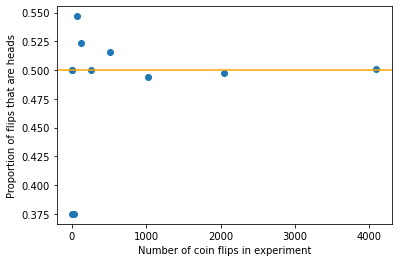

In [35]:
fig, ax = plt.subplots()
plt.xlabel('Number of coin flips in experiment')
plt.ylabel('Proportion of flips that are heads')
plt.axhline(0.5, color='orange')  # Expected probability
_ = ax.scatter(ns, proportion_heads)


# 1.8 Probability Distributions in Statistics


In [37]:
n_experiments = 1000
heads_count = np.random.binomial(5, 0.5, n_experiments)

In [38]:
heads, event_count = np.unique(heads_count, return_counts=True)

In [40]:
heads, event_count

(array([0, 1, 2, 3, 4, 5]), array([ 31, 168, 292, 324, 147,  38]))

In [42]:
event_prob = event_count / n_experiments
event_prob

array([0.031, 0.168, 0.292, 0.324, 0.147, 0.038])

Text(0, 0.5, 'Event probability')

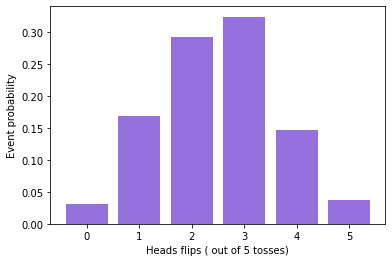

In [45]:
plt.bar(heads, event_prob, color='mediumpurple')
plt.xlabel('Heads flips ( out of 5 tosses)')
plt.ylabel('Event probability')

Text(0, 0.5, 'Event probability')

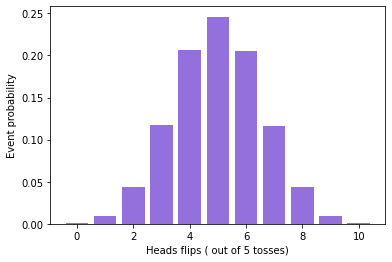

In [55]:
n_experiments = 1000000
heads_count = np.random.binomial(10, 0.5, n_experiments)
heads, event_count = np.unique(heads_count, return_counts=True)
event_prob = event_count / n_experiments

plt.bar(heads, event_prob, color='mediumpurple')
plt.xlabel('Heads flips ( out of 5 tosses)')
plt.ylabel('Event probability')


# 1.9 Bayesian versus Frequentist Statistics
- Can incorporate prior knowledge from e.g. experimental results, beliefs
- How lay people think about probabilities :"There's 67% chance it'll rain today."
- English philosopher **Thomas Bayes**
  - Devised particular case of "Bayes'theorem" in 1763
- French polymath **Pierre-Simon Laplace"**
  - Generally computationally expensive.

## Frequentist Statistics
- Focus on "objective" probabilities
- "On 100 days exactly like today, it would rain on 80 of them."
- Arbitrary threshold of "less than 5% chance result occurs by chance."
- (Sir) R.A. Fisher and (declined Sir) Karl Pearson developed much of modern statistical techniques in 20th.
- Drawbacks: 
  - Not dsigned for large feature sets (inputs)
  - 5% threshold too high for large sample sizes

# 1.10 Applications of Probability to Machine Learning
- Bayesian stats has become a type of ML today where:
  - Sample sizes tend to be not very large
  - Typically have evidence for priors (initail parameter values)
- Probability concepts ubiquitous in AL including ML.
  - Uncertainly typically involved in mapping inputs to outputs.
  - Models the output in the language of probabilities: 
    - Image classification: "95% chance image is of a hot dog"
  - With STATS, can confidently compare model performances
  - Some models are **stocastic (non-deterministic)**.

Why can't most AI systems be certain and deterministic?
1. The process being modeled is itself stochastic:
    - Games of chance
    - Human behaviour in general
    - Stock market in particular
2. Model inputs are not comprehensive.
    - Car crash inevitable around curve.
    - Candidate for role has offer from other employer.
3. Model is incomplete:
    - Computational complexity of perfect solution is astronomical.
    - Modelling approach for solving problem perfectly is unknown.
    - Building perfect model is unreasonably expensive.


# Frequent Functions
- ```np.random.binomial(events, probabiltiy, trials)```  
- ```np.unique(array, return_counts=True)```  
    - ```return_counts = True```!!!